# Let's check out the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')

In [3]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
questions = df.iloc[0, :].T
df = df.iloc[1:, :]

In [5]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Let's check age distribution

Simply one linear

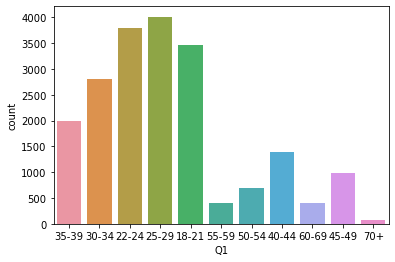

In [6]:
sns.countplot(df['Q1'])

Now make it better

In [9]:
data_q1.index

Index(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70+'],
      dtype='object')

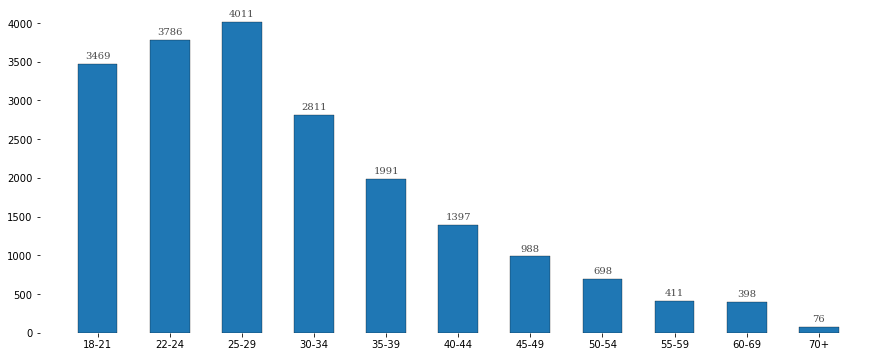

In [8]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
data_q1 = df['Q1'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width = 0.55, edgecolor = 'black',linewidth=0.3)
for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", 
                   xy=(i, data_q1[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

# Let's check gender distribution

In [10]:
df1 = df.copy()

In [11]:
df1['Q2'].value_counts()

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Create a new category when there is no man and woman

In [12]:
df1['Q2'] = df1['Q2'].apply(lambda x: 'others' if x not in ['Man','Woman'] else x)
data_q1q2 = df1[df1['Q2'] != 'others'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()

In [13]:
data_q1q2

Q1,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Q2,,,,,,,,,,,
Man,2611,2838,3128,2246,1581,1153,840,605,353,362,72
Woman,796,886,819,504,368,222,126,81,45,29,2


In [14]:
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

In [15]:
man.index

Index(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70+'],
      dtype='object', name='Q1')

<BarContainer object of 11 artists>

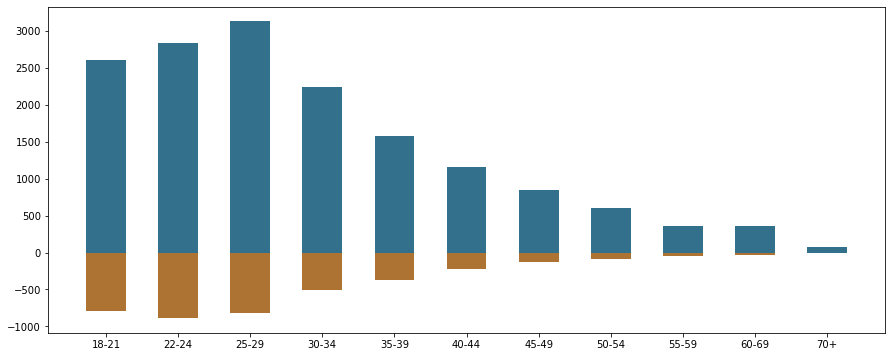

In [16]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#995000', alpha=0.8, label='Female')

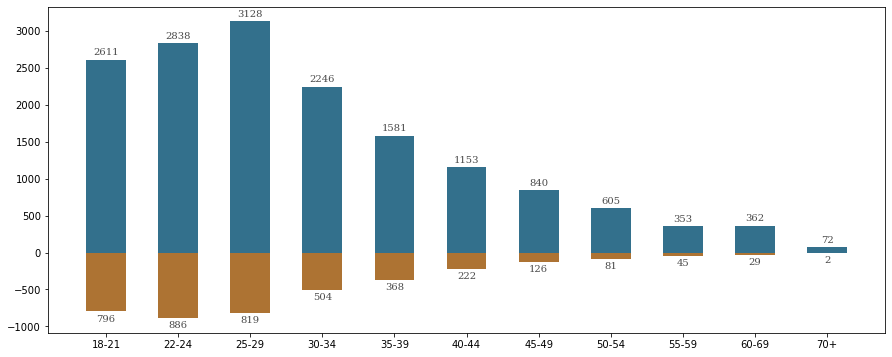

In [17]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#995000', alpha=0.8, label='Female')


for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

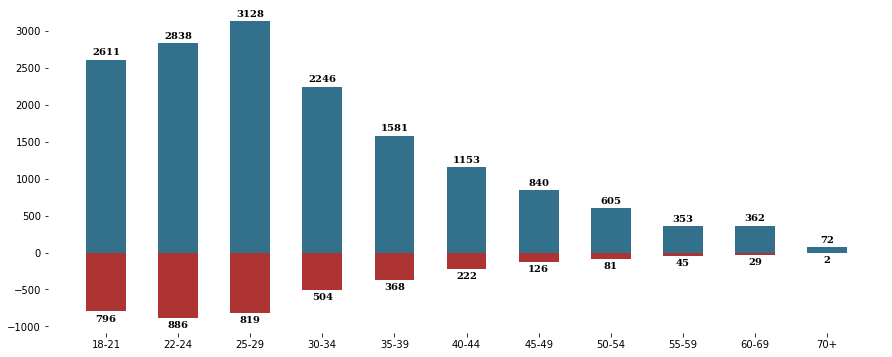

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990100', alpha=0.8, label='Female')


for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='serif',
                   color='black')
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='serif',
                   color='black')
    

for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

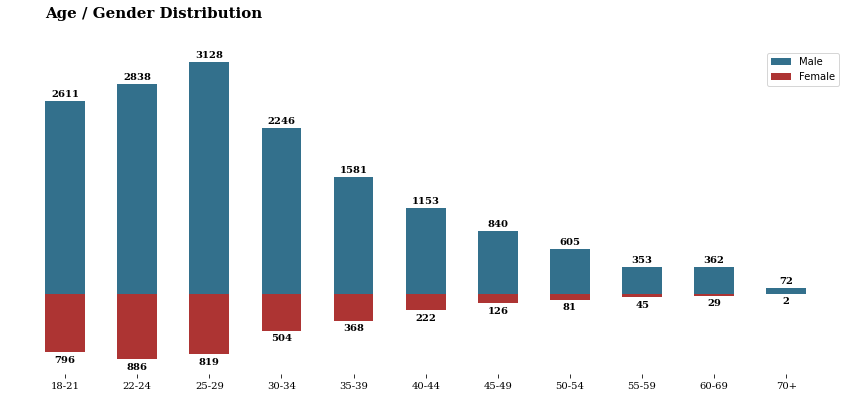

In [19]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990100', alpha=0.8, label='Female')


for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='serif',
                   color='black')
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='serif',
                   color='black')
    

for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)


ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()

# Country and gender distribution

In [20]:
df2 = df.copy()

In [27]:
df2['Q2'] = df2['Q2'].apply(lambda x: 'others' if x not in ['Man','Woman'] else x)

In [28]:
q3_order = df2['Q3'].value_counts()[:11].drop('Other').index

In [29]:
data_q2q3 = df2[['Q2','Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]

In [30]:
data_q2q3['sum'] = data_q2q3.sum(axis=1)

In [31]:
data_q2q3_ratio = (data_q2q3.T/data_q2q3['sum']).T[['Man','Woman','others']].rename(index={'United States of America':'USA','United Kingdom of Great Britain and Northern Ireland':'UK'})[::-1]

In [32]:
data_q2q3_ratio

Q2,Man,Woman,others
Turkey,0.723837,0.252907,0.023256
Germany,0.806931,0.163366,0.029703
China,0.818565,0.145570,0.035865
Nigeria,0.823529,0.170168,0.006303
UK,0.789366,0.186094,0.024540
Russia,0.843643,0.137457,0.018900
Japan,0.924765,0.065831,0.009404
Brazil,0.863112,0.134006,0.002882
USA,0.751006,0.215914,0.033080
India,0.767561,0.220304,0.012135


<BarContainer object of 10 artists>

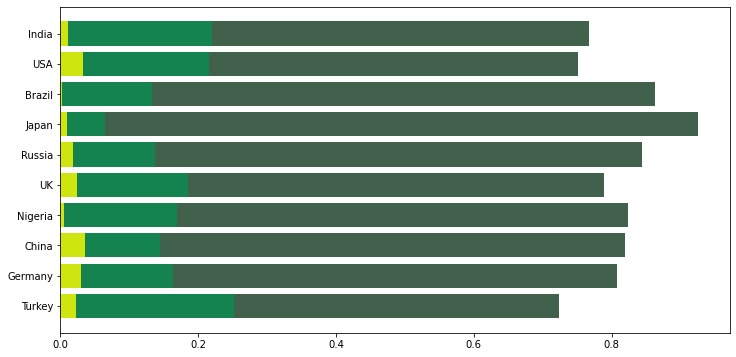

In [33]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#133a20', alpha=0.8, label='Male')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'], color='#098c50', alpha=0.8, label='Female')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['others'], color='yellow', alpha=0.8, label='Others')

<BarContainer object of 10 artists>

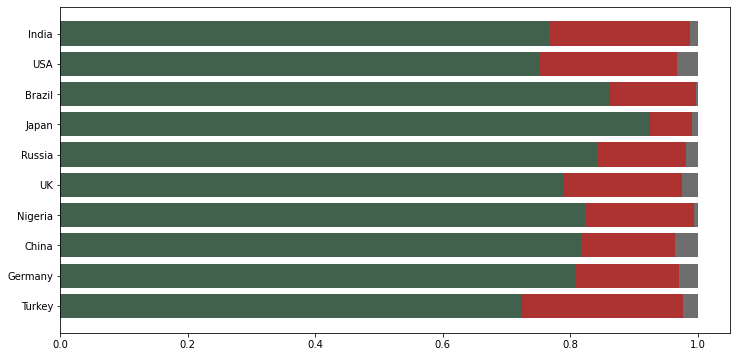

In [34]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#133a20', alpha=0.8, label='Male')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'],left=data_q2q3_ratio['Man'], color='#990000', alpha=0.8, label='Female')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['others'],left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'],color='#4a4a4a', alpha=0.8, label='Others')

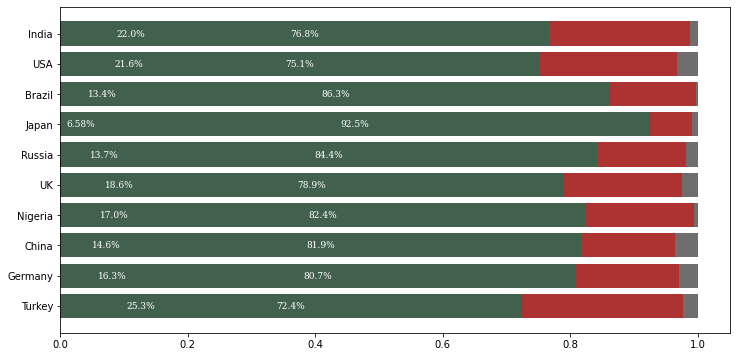

In [35]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#133a20', alpha=0.8, label='Male')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'],left=data_q2q3_ratio['Man'], color='#990000', alpha=0.8, label='Female')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['others'],left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'],color='#4a4a4a', alpha=0.8, label='Others')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Woman'][i]/2,i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    


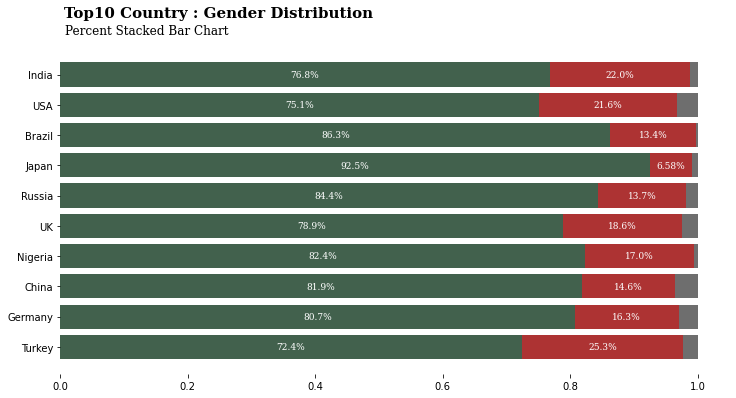

In [36]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#133a20', alpha=0.8, label='Male')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'],left=data_q2q3_ratio['Man'], color='#990000', alpha=0.8, label='Female')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['others'],left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'],color='#4a4a4a', alpha=0.8, label='Others')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.95, 'Top10 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

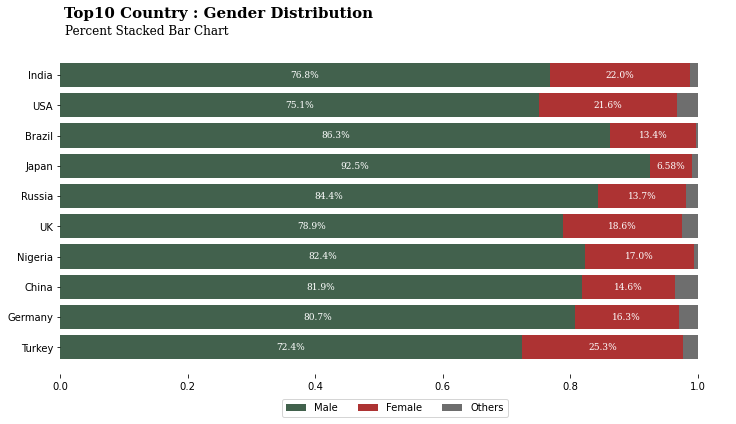

In [37]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),)
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#133a20', alpha=0.8, label='Male')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'],left=data_q2q3_ratio['Man'], color='#990000', alpha=0.8, label='Female')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['others'],left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'],color='#4a4a4a', alpha=0.8, label='Others')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.95, 'Top10 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Degree and Work Experience

In [38]:
df3 = df.copy()

In [39]:
df3['Q4'].value_counts()

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

In [40]:
q4_order = [
    'No formal education past high school',
    'Professional degree',
    'Some college/university study without earning a bachelor’s degree',
    'Bachelor’s degree',
    'Master’s degree',
    'Doctoral degree',
    'I prefer not to answer'
]
df3['Q4'].value_counts()[q4_order]

No formal education past high school                                  240
Professional degree                                                   699
Some college/university study without earning a bachelor’s degree    1092
Bachelor’s degree                                                    6978
Master’s degree                                                      7859
Doctoral degree                                                      2302
I prefer not to answer                                                399
Name: Q4, dtype: int64

<BarContainer object of 7 artists>

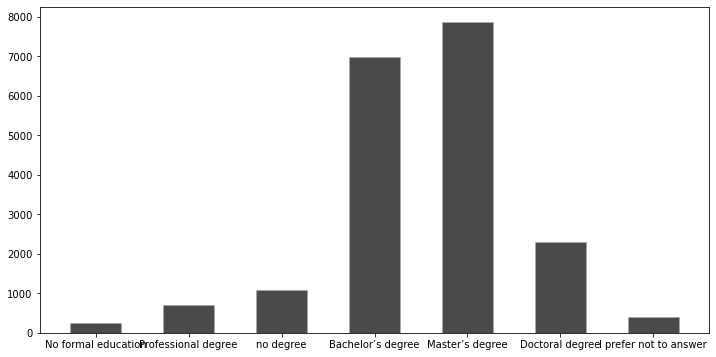

In [41]:
data_q4 = df3['Q4'].value_counts()[q4_order].rename(index={'No formal education past high school':'No formal education','Some college/university study without earning a bachelor’s degree':'no degree'})
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q4.index, data_q4, width=0.55, 
       edgecolor='darkgray', color='#4a4a4a',
       linewidth=0.7)

[Text(0, 0, 'No formal education'),
 Text(0, 0, 'Professional degree'),
 Text(0, 0, 'no degree'),
 Text(0, 0, 'Bachelor’s degree'),
 Text(0, 0, 'Master’s degree'),
 Text(0, 0, 'Doctoral degree'),
 Text(0, 0, 'I prefer not to answer')]

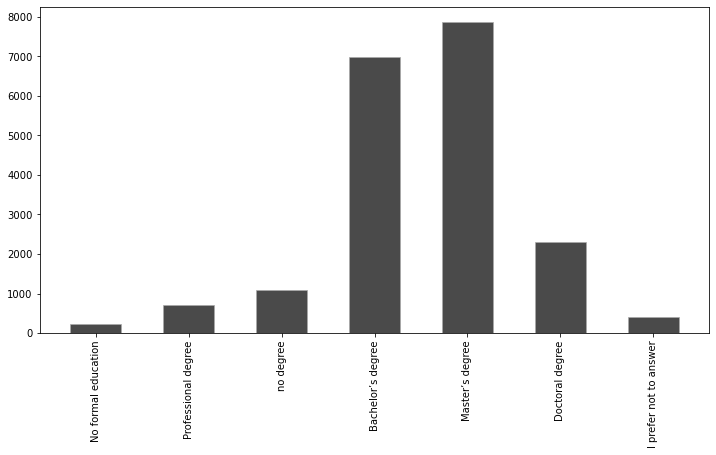

In [42]:
data_q4 = df3['Q4'].value_counts()[q4_order].rename(index={'No formal education past high school':'No formal education','Some college/university study without earning a bachelor’s degree':'no degree'})
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q4.index, data_q4, width=0.55, 
       edgecolor='darkgray', color='#4a4a4a',
       linewidth=0.7)

ax.set_xticklabels(data_q4.index, rotation=90)

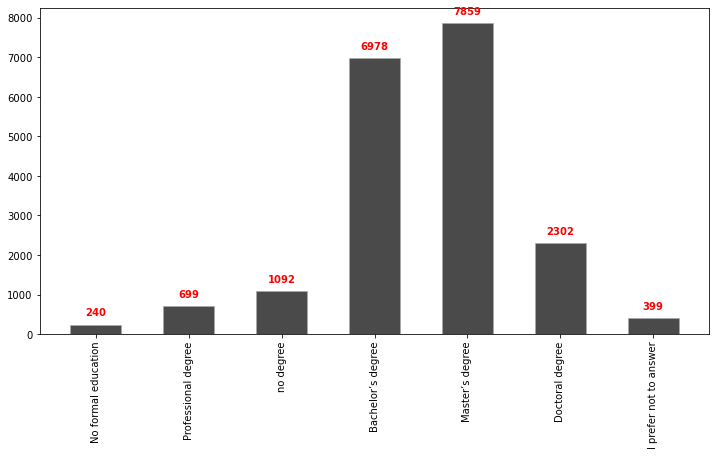

In [43]:
data_q4 = df3['Q4'].value_counts()[q4_order].rename(index={'No formal education past high school':'No formal education','Some college/university study without earning a bachelor’s degree':'no degree'})
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q4.index, data_q4, width=0.55, 
       edgecolor='darkgray', color='#4a4a4a',
       linewidth=0.7)

ax.set_xticklabels(data_q4.index, rotation=90)

for i in data_q4.index:
    ax.annotate(f"{data_q4[i]}", 
                   xy=(i, data_q4[i] + 300),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='verdana',
                   color='RED')


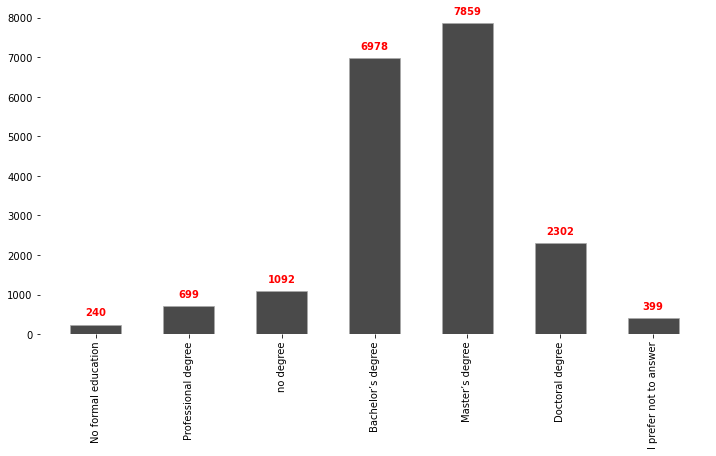

In [44]:
data_q4 = df3['Q4'].value_counts()[q4_order].rename(index={'No formal education past high school':'No formal education','Some college/university study without earning a bachelor’s degree':'no degree'})
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q4.index, data_q4, width=0.55, 
       edgecolor='darkgray', color='#4a4a4a',
       linewidth=0.7)

ax.set_xticklabels(data_q4.index, rotation=90)

for i in data_q4.index:
    ax.annotate(f"{data_q4[i]}", 
                   xy=(i, data_q4[i] + 300),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='verdana',
                   color='RED')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

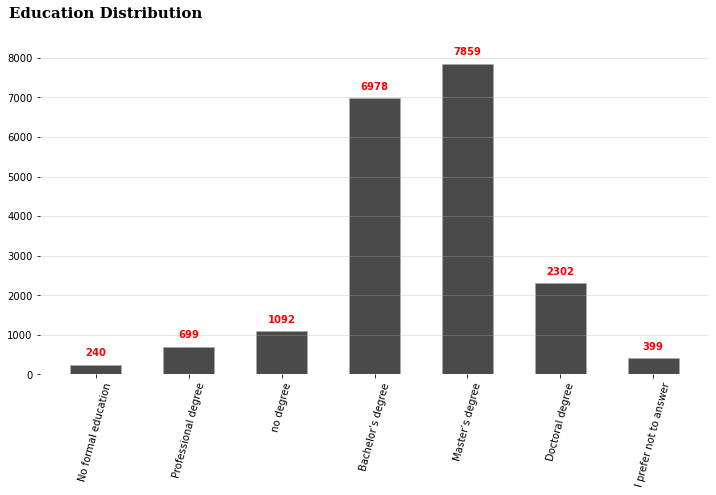

In [45]:
data_q4 = df3['Q4'].value_counts()[q4_order].rename(index={'No formal education past high school':'No formal education','Some college/university study without earning a bachelor’s degree':'no degree'})
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data_q4.index, data_q4, width=0.55, 
       edgecolor='darkgray', color='#4a4a4a',
       linewidth=0.7)

ax.set_xticklabels(data_q4.index, rotation=75)

for i in data_q4.index:
    ax.annotate(f"{data_q4[i]}", 
                   xy=(i, data_q4[i] + 300),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='verdana',
                   color='RED')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


fig.text(0.09, 0.95, 'Education Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    

# Experience Distribution

In [46]:
df5 = df.copy()

In [47]:
data_q5 = df5['Q6'].value_counts()

In [48]:
data_q5

3-5 years                    4546
1-2 years                    4505
< 1 years                    3313
5-10 years                   2552
10-20 years                  1751
20+ years                    1329
I have never written code    1124
Name: Q6, dtype: int64

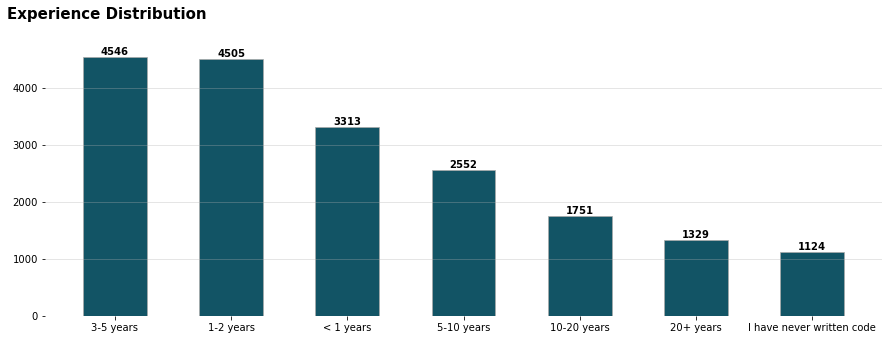

In [49]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
ax.bar(data_q5.index, data_q5, width=0.55, 
       edgecolor='darkgray', color='#125465',
       linewidth=0.7)

for i in data_q5.index:
    ax.annotate(f"{data_q5[i]}", 
                   xy=(i, data_q5[i] + 100),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='verdana',
                   color='BLACK')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


fig.text(0.09, 0.95, 'Experience Distribution', fontsize=15, fontweight='bold', fontfamily='verdana')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    

# Education and Experience

In [50]:
df6 =df.copy()

In [51]:
df6['count'] = 1

In [59]:
df7 = pd.pivot_table(df6, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum).loc[q6_order, q4_order]

In [60]:
df7

Q4,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree,Bachelor’s degree,Master’s degree,Doctoral degree,I prefer not to answer
Q6,,,,,,,
I have never written code,36,77,101,407,377,79,47
< 1 years,52,131,280,1442,1155,167,86
1-2 years,53,125,293,2101,1627,220,86
3-5 years,29,115,188,1723,2031,397,63
5-10 years,14,81,87,603,1233,504,30
10-20 years,17,92,49,325,753,492,23
20+ years,24,59,62,218,529,407,30


In [61]:
q6_order = [
      'I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years',
]

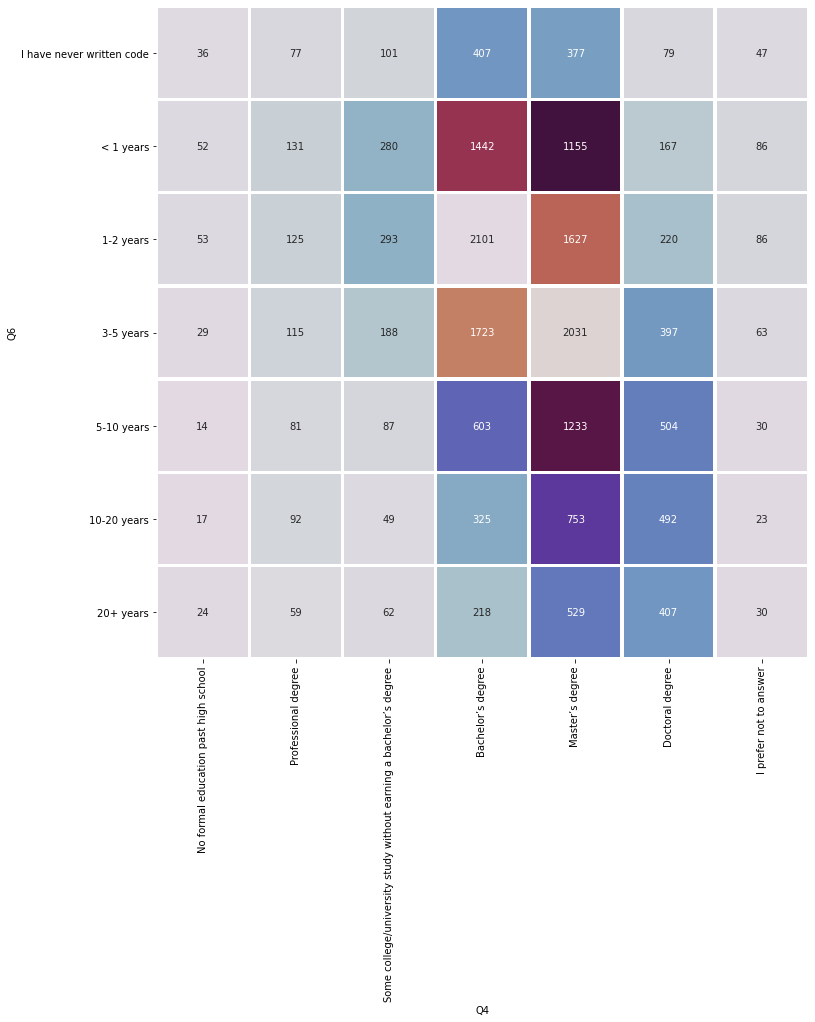

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(df7, 
            cmap="twilight",
            square=True, 
            linewidth=2.5, 
            cbar=False, 
            ax=ax,
            annot=True,
            fmt="d"
           )

# What data visualization libraries or tools do you use on a regular basis? 

In [87]:
df9 = df.copy()

In [69]:
df8.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [80]:
data_q14

,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER
1,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geoplotlib,NaN,NaN,NaN
2,Matplotlib,Seaborn,NaN,Ggplot / ggplot2,Shiny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,D3 js,NaN,NaN,NaN,NaN,NaN,NaN
4,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,Matplotlib,Seaborn,NaN,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,Matplotlib,Seaborn,Plotly / Plotly Express,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,Leaflet / Folium,NaN,NaN


In [81]:
data_q14_count = pd.Series(dtype='int')

In [101]:
data_q14 = df9[[i for i in df9.columns if 'Q14' in i]]
data_q14_count = pd.Series(dtype='int')
for i in data_q14.columns:
    data_q14_count[data_q14[i].value_counts().index[0]] = data_q14[i].count()

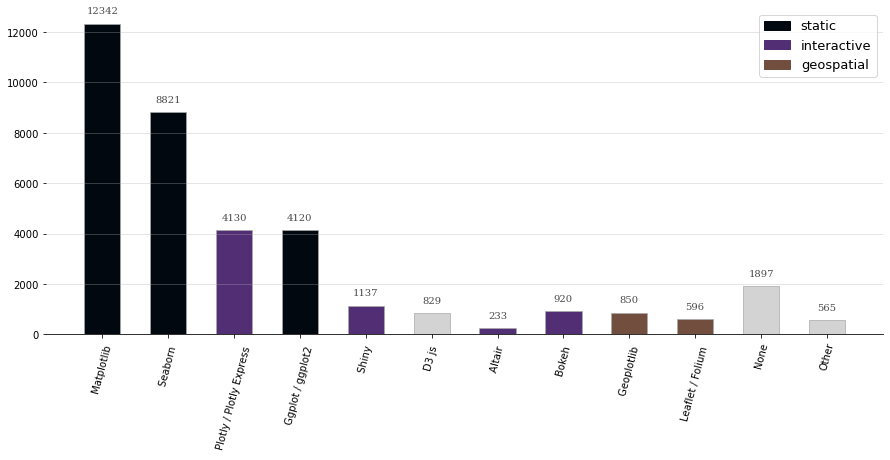

In [103]:
fig, ax = plt.subplots(1,1, figsize=(15, 6))

colors = ['lightgray'] * 14 
colors[0] = colors[1] = colors[3] = '#02080F'
colors[2] = colors[4] = colors[6] = colors[7] = '#522e75'
colors[8] = colors[9] = '#714e3d'
ax.bar(data_q14_count.index, data_q14_count, width=0.55, 
       edgecolor='darkgray', color=colors,
       linewidth=0.7)


for i in data_q14_count.index:
    ax.annotate(f"{data_q14_count[i]}", 
                   xy=(i, data_q14_count[i] + 500),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(data_q14_count.index, rotation=75)

ax.grid(axis='y', linestyle='-', alpha=0.4)    

import matplotlib.patches as mpatches
static = mpatches.Patch(color='#02080F', label='static')
interactive = mpatches.Patch(color='#522e75', label='interactive')
geo = mpatches.Patch(color='#714e3d', label='geospatial')

plt.legend(handles=[static, interactive, geo], fontsize=13)

# Earning